time= 1555927206.0241115 epoch= 3000 loss= 8761.286798758834


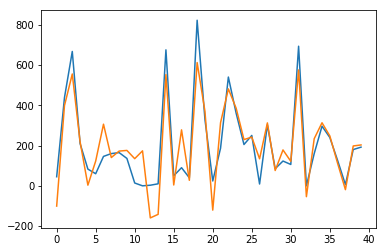

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

import time
import sys  
sys.path.append("..")
import dim
x=dim.randint(0,10,300,4)
y=(x[:,0]*x[:,1]+x[:,2]*x[:,3]*10).reshape(300,1)
from dim.utils.data import Dataset,DataLoader
epoch_size=5000
batch_size=200
#x=torch.randint(0,10,(1000,4))
#y=(x[:,0]*x[:,1]+x[:,2]*x[:,3]).reshape(1000,1)
train_data ,test_data = dim.concat((x,y),1).split([int(x.shape[0]*0.8)],0)
print(train_data.shape,test_data.shape)
train_loader = DataLoader(Dataset(train_data,4),batchSize=batch_size,shuffle=True,dropLast=False)
test_loader = DataLoader(Dataset(test_data,4),batchSize=batch_size,shuffle=True,dropLast=False)

seq=dim.nn.Sequential(
  dim.nn.Linear(4,20,bias=True),
  #dim.nn.ReLU(),
  dim.nn.Linear(20,10),
  #dim.nn.ReLU(),
  #dim.nn.Linear(10,5),
  #dim.nn.ReLU(),
  dim.nn.Linear(10,1,bias=True)
)
optim = dim.optim.Adam(seq.parameters())
#optim = dim.optim.SGD(seq.parameters())
#optim = dim.optim.Adamax(seq.parameters())
#optim = dim.optim.RMSprop(seq.parameters())
#criterion=dim.nn.CrossEntropyLoss()
criterion = dim.nn.MSELoss()

start=time.time()
for epoch  in range(epoch_size):
  for idx , (data,label) in enumerate(train_loader):
    if (idx):
      loss.backward()
      optim.step()
      optim.zeroGrad()
      #loss.gradFn.clearData()
    pred = seq(data)
    loss=criterion(pred,label)
  if (epoch%1000==0):
    print("time=",time.time(),"epoch=",epoch,"loss=",loss.gradFn.eval(True).value())
    plt.cla()
    axis=dim.arange(label.shape[0])
    plt.plot(axis,label,pred)
    plt.pause(1)
    display.clear_output(wait=True)

end=time.time()
print("total time:",end-start)

x1=dim.randint(0,10,5,4)
y1=(x1[:,0]*x1[:,1]+x1[:,2]*x1[:,3]*10).reshape(5,1)
yh=seq(x1)
print(x1)
print(y1)
print(yh)
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(y1.shape[0])
plt.plot(x,y1,yh)
plt.show()

In [ ]:
for i in range(0):
    loss.gradFn.eval().backward()
    optim.step()
    optim.zeroGrad()
    loss.gradFn.clearData()
print("error:",loss.gradFn.eval())

In [ ]:
loss.gradFn.clearData()
loss.backward()
print(loss.expression())
loss.gradExpression()

In [ ]:
loss.backward()

In [ ]:
loss.gradFn.clearData()
list(loss.gradFn._grads[x].eval().sum() for x in loss.gradFn._grads)

In [ ]:
print(list((x.sum(),x.grad is not None and x.grad.sum()) for x in seq.parameters()))
optim.step()
optim.zeroGrad()

In [ ]:
loss.expression()

In [ ]:
loss.gradExpression()


In [ ]:
loss.backward()
params = seq.parameters()
next(params)


In [ ]:
for i,x in enumerate(list(seq.parameters())):
    print(i,x)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(y1.shape[0])
plt.plot(x,y1,yh)
plt.show()